# Importing all the needed libraries

In [ ]:
%%capture
!pip install geopandas

In [ ]:
%%capture
from typing import List
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from tqdm.notebook import tqdm
from datetime import datetime
plt.style.use('bmh')
%matplotlib inline
import scipy
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import time

# Imports needed for point c in the bonus section:
!pip install langdetect
from langdetect import detect
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
import plotly.express as px

# We ingore warnings for the submit
import warnings
warnings.filterwarnings('ignore')

# Download all the datasets

In [ ]:
%%capture
# Download for the instagram_posts
!wget https://adm2022.s3.amazonaws.com/instagram_posts.zip

# Download for the instagram_profiles
!wget https://adm2022.s3.amazonaws.com/instagram_profiles.zip

# Download for the instagram_locations
!wget https://adm2022.s3.amazonaws.com/instagram_locations.zip

# Auxiliary Functions

In [ ]:
def info_dataframe(dataframe: pd.DataFrame,
                   color: str) -> None:
  """Display some info about the dataframe.

  Args:
    - dataframe (pd.DataFrame): The dataframe for which we want to show the info.
    - color (str): The color for the missingno plot.

  Returns:
    - None
  """
  display(dataframe.head())
  print()
  print("#"*100)
  print()
  display(dataframe.info())
  print()
  print("#"*100)
  print()
  display(dataframe.isnull().sum())
  print()
  print("#"*100)
  print()
  msno.bar(dataframe, color=color)
  plt.show()

# RQ1

## Locations Dataset

In [ ]:
locations = pd.read_csv(r"instagram_locations.zip", delimiter='\t', low_memory=True)

Show some info about the dataframe:

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703



####################################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_

None


####################################################################################################



sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64


####################################################################################################



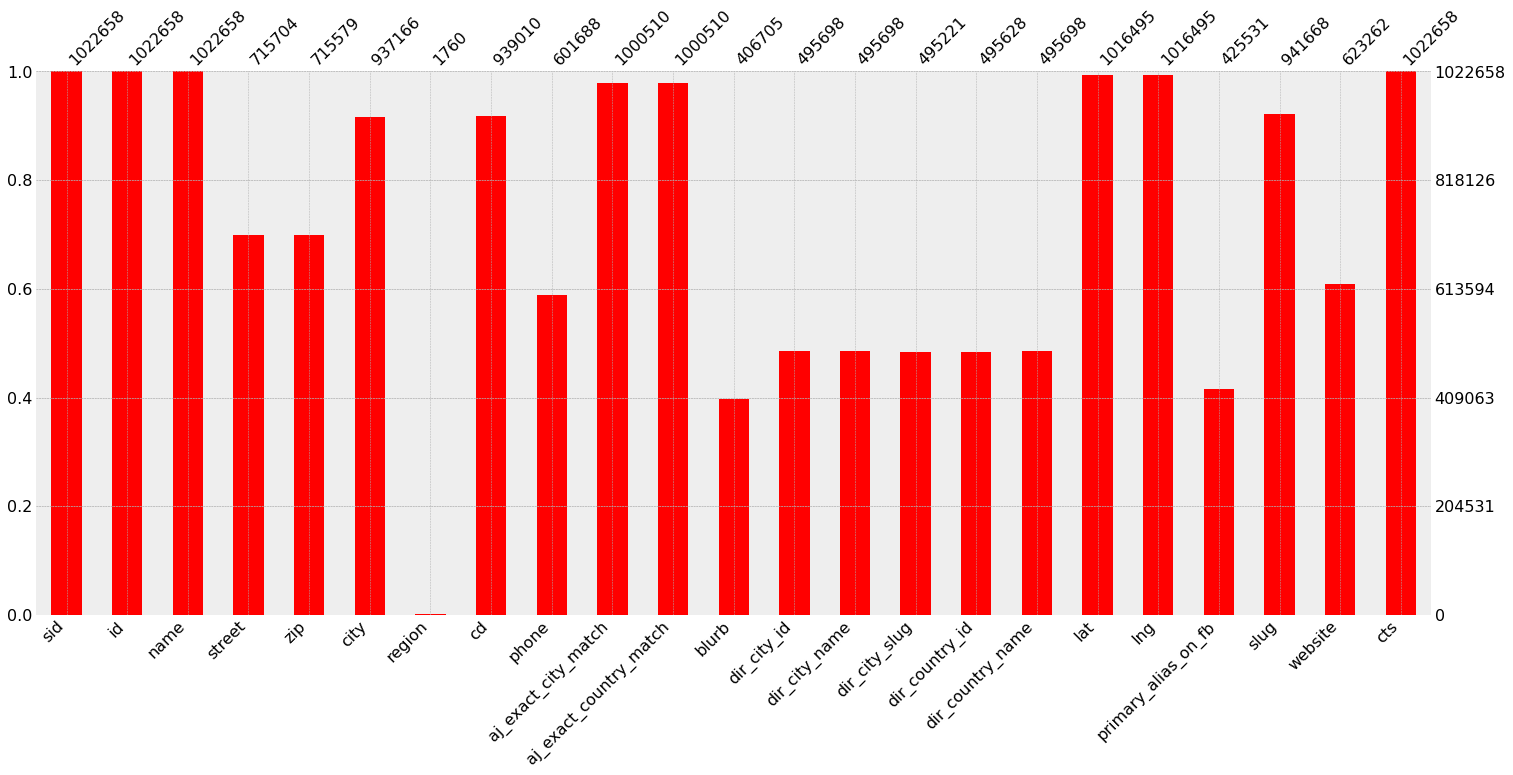

In [ ]:
info_dataframe(dataframe=locations, color="red")

From the information we can state that the variable "region" has a huge presence of missing values, in fact only 1760 rows are present. 
In addition, there are variables in which about half of the observations are missing, such as "blurb," "dir_city_id" and "dir_city_name".
To conclude the discussion on NAs, we can note that the variables "sid" , "id", "name" and "cts" have no missing values. This was to be expected as data that as far as the structure of instagram is concerned is not possible not to have within the dataset.

Change format for dates:

In [ ]:
locations.cts = pd.to_datetime(locations.cts)

Looking at the values in location `cd` we can see that the USA are the countries most present in the locations, followed by England, Russia, Italy and Canada

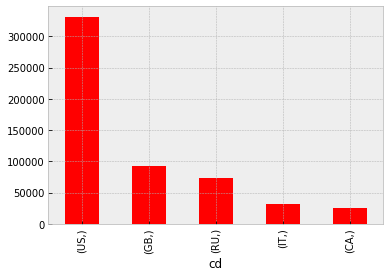

In [ ]:
locations[['cd']].dropna().value_counts().head(5).plot(kind='bar',color="red")
plt.show()

We save a copy of the dataset containing only the `lat` and `lng` values to plot the locations using `geopandas`.

In [ ]:
locations_copy = locations.dropna(subset=['lat', 'lng'])[['lat', 'lng']]

We plot the locations on a world map using `geopandas`.


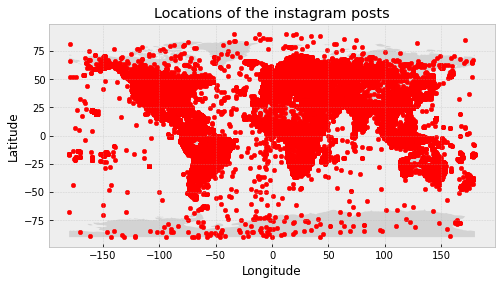

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

locations_copy.lat = pd.to_numeric(locations_copy.lat)
locations_copy.lng = pd.to_numeric(locations_copy.lng)

countries = gpd.read_file( gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey", ax=ax)
# in our dataset latitude and longitude are reversed
locations_copy.plot(x="lat", y="lng", kind="scatter", colormap="YlOrRd", ax=ax, c='red')


ax.grid(b=True, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of the instagram posts')
plt.show()

# Clear Memory
del locations_copy

Since all variables represent nonattributable values, i.e., it is not correct to apply techniques such as mean, mode, or median to replace values, we decided to fill NA with a blank space.



In [ ]:
locations.fillna("", inplace=True)

In the figure above we can see the distribution of the various locations of the posts through the variables lat and lng in our dataset.

Save the cleaned version:

In [ ]:
locations.to_csv(path_or_buf='locations.csv', sep='\t')

Clear Memory

In [ ]:
del locations
del countries

## Profiles Dataset

In [ ]:
profiles = pd.read_csv(r"instagram_profiles.zip", delimiter='\t', low_memory=True)

Show some info of the dataframe:

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN



####################################################################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


None


####################################################################################################



sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64


####################################################################################################



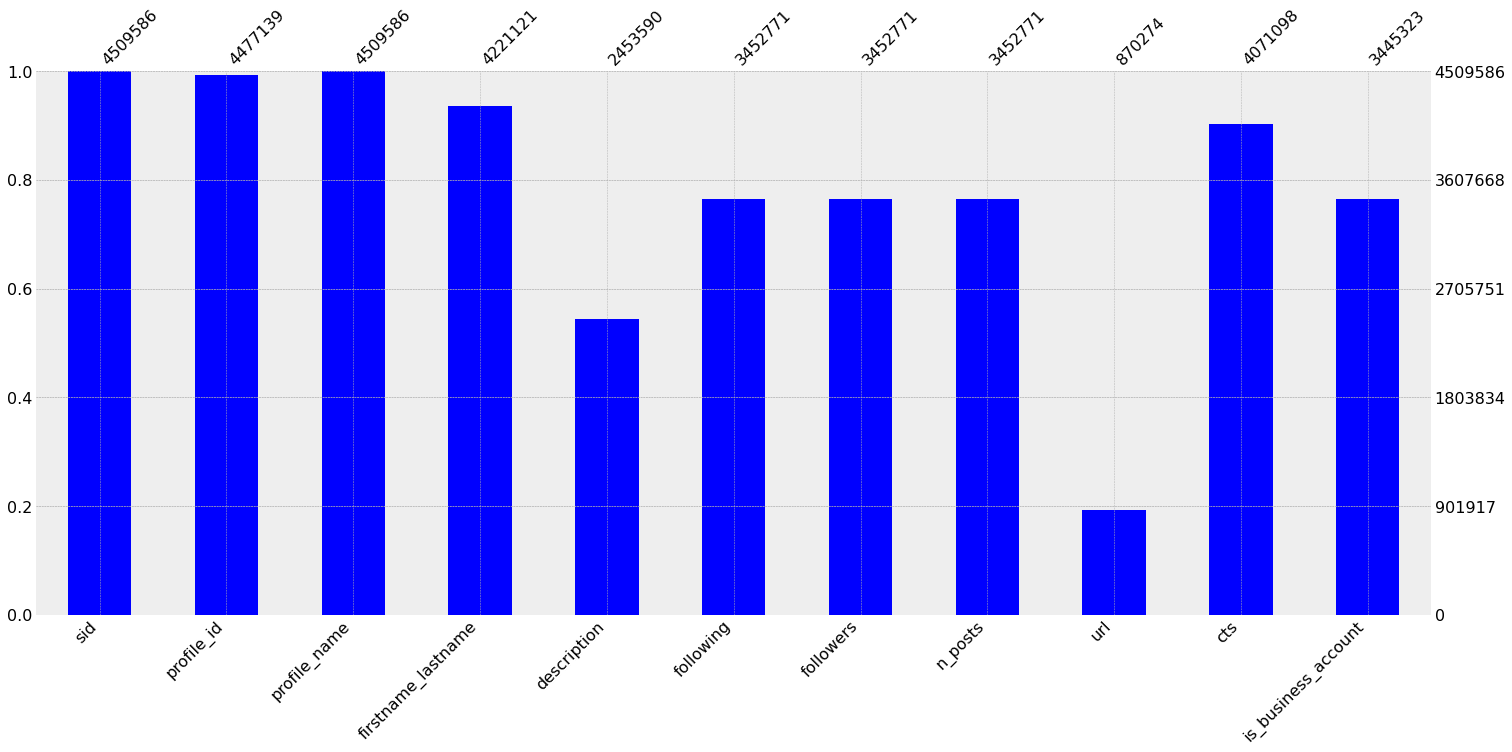

In [ ]:
info_dataframe(dataframe=profiles, color="blue")

It can be seen that some variables have many missing values, for example in "url" 80% of the values are missing.

Two different strategies were used to replace NAs, depending on the type of variable:

In [ ]:
profiles.description.fillna('', inplace=True)
profiles.firstname_lastname.fillna('', inplace=True)
profiles.url.fillna('', inplace=True)
profiles.profile_id.fillna(0, inplace=True)
profiles.cts.fillna('', inplace=True)

For the variables that have unique user values, which cannot be assigned values in any way, we decided to leave them empty.

In [ ]:
profiles.is_business_account.fillna(profiles.is_business_account.mode().bool(), inplace=True)
for i in profiles.columns[profiles.isnull().any(axis=0)]:  
    profiles[i].fillna(profiles[i].median(), inplace=True)

We decided to replace the missing values of the variable "is_business_account" with the column mode, that is "False", instead for the remaining columns we used the mode.

Change dates format:

In [ ]:
profiles.cts = pd.to_datetime(profiles.cts)

Set the columns to numeric and set the type to int:

In [ ]:
profiles = profiles[pd.to_numeric(profiles['profile_id'], errors='coerce').notnull()]
profiles = profiles[pd.to_numeric(profiles['following'], errors='coerce').notnull()]
profiles = profiles[pd.to_numeric(profiles['followers'], errors='coerce').notnull()]
profiles = profiles[pd.to_numeric(profiles['n_posts'], errors='coerce').notnull()]

profiles['profile_id'] = profiles['profile_id'].astype('int64')
profiles['following'] = profiles['following'].astype('int64')
profiles['followers'] = profiles['followers'].astype('int64')
profiles['n_posts'] = profiles['n_posts'].astype('int64')

After transforming the variables, the appearance of the dataset improved.

In [ ]:
subset = profiles[['following', 'followers', 'n_posts', 'is_business_account']].astype('int64') # subset only the numerical variables
subset.describe().astype('int64')

,following,followers,n_posts,is_business_account
count,4509586,4509586,4509586,4509586
mean,1252,3724,341,0
std,7104,169682,919,0
min,0,0,0,0
25%,464,221,41,0
50%,754,406,120,0
75%,1198,729,287,0
max,4191080,285457645,183730,1


We can say that there are less business account than the normal ones. The numbers of followers is very variable.
In addition, we can see, only looking at the median and the mean, that each variable has a skewed distribution: there are some outliers that are forming a long right tail in the distribution.



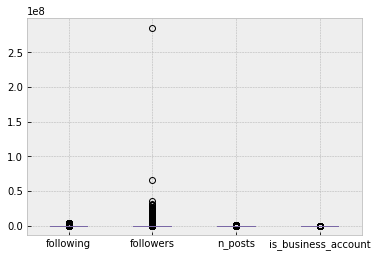

In [ ]:
subset.boxplot()
plt.show()

From the boxplots we can say that our impressions are right.

Relation between the numbers of followers and numbers of posts

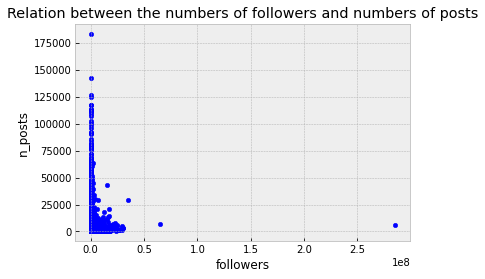

In [ ]:
subset.plot.scatter(x='followers', y='n_posts', c='blue')
plt.title("Relation between the numbers of followers and numbers of posts")
plt.show()

Show the heatmap:

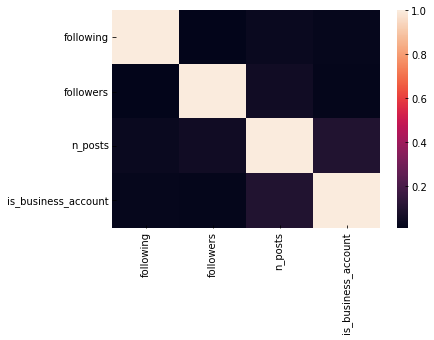

In [ ]:
sns.heatmap(subset.corr())
plt.show()

From the heatmap we can say that the correlation coefficient between the variables is always very small, close to zero.
The pair (is_business_account, n_posts) turns out to be the one with the largest correlation coefficient, about 0.2. so we can deduct that there is a minimal link between these two variables, but it is weak.

In [ ]:
yes=profiles.n_posts[profiles.is_business_account == 1] # select only the business accounts
no=profiles.n_posts[profiles.is_business_account == 0] # select only the normal accounts

# Apply the logarithm(x+1) to both the subset. we add the +1 beacuse log(0) does not exist

yes = yes.apply(lambda x : np.log(x+1)) 
no =  no.apply(lambda x : np.log(x+1))
print(len(no),len(yes)) # print the size of the two subset

3654332 855254


We used the logarithmic scale to better visualize our data

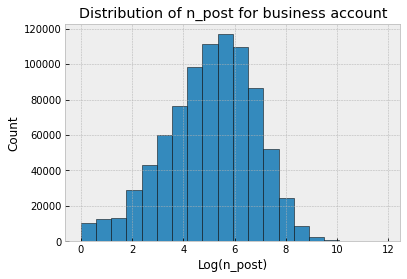

In [ ]:
plt.hist(yes.tolist(),bins=20, edgecolor="black")
plt.title('Distribution of n_post for business account')
plt.xlabel('Log(n_post)')
plt.ylabel('Count')
plt.show()

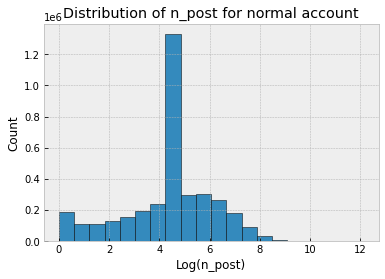

In [ ]:
plt.hist(no.tolist(),bins=20, edgecolor="black")
plt.title('Distribution of n_post for normal account')
plt.xlabel('Log(n_post)')
plt.ylabel('Count')
plt.show()

In [ ]:
print(np.mean(no), np.mean(yes))

4.445650057394731 5.043289213984342


From the plots, we can tell that the business account has a higher number of posts than the others. in fact although there are obviously more normal accounts, we can see that the average number of posts of the normal accounts is lower than the business accounts.
This difference is probably due to the fact that many business pages have to sell products and a higher number of posts ensures more visibility to possible buyers.

We save the cleaned version of the dataframe

In [ ]:
profiles.to_csv(path_or_buf='profiles.csv', sep='\t')

Clear the memory

In [ ]:
del profiles, subset, yes, no

## Posts Dataset

Since this dataset is very large, therefore we found it computationally very heavy to perform all the various analyses and metrics reported in the previous datasets, so we decided to do the following:
1. report a head of the first 5 rows of the dataset.
2. select a subset of variables for which to do some analysis, most of which will involve the columns `numbr_likes` and `number_comments`

In [ ]:
posts = pd.read_csv(r"instagram_posts.zip", delimiter='\t', usecols=['sid_profile', 'post_id', 'profile_id','location_id', 'cts','description','post_type', 'numbr_likes', 'number_comments'], low_memory=True,nrows=5)
posts.head()

,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [ ]:
del posts

profile_id          2583292
location_id        12972772
post_type                 0
numbr_likes              36
number_comments          36
dtype: int64


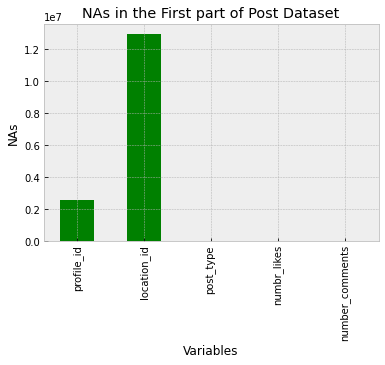

In [ ]:
posts=pd.read_csv(r"instagram_posts.zip", delimiter='\t', usecols=['profile_id', 'post_type', 'numbr_likes', 'number_comments', 'location_id'])
nan_presence = posts.isnull().sum()
print(nan_presence)
nan_presence = pd.to_numeric(nan_presence)
nan_presence.plot(x='Variables', y='NA',color="green",kind="bar")
plt.title("NAs in the First part of Post Dataset")
plt.xlabel("Variables")
plt.ylabel("NAs")
plt.show()

In [ ]:
print(nan_presence)

profile_id          2583292
location_id        12972772
post_type                 0
numbr_likes              36
number_comments          36
dtype: int64


From the chart and the data shown, we can see that there are some missing values for the variables `location_id` and `profile_id`. For the number of comments and likes instead only of 36 users out of 41 million we have no data, this is irrelevant. lastly for `post_type` we have no missing values

In [ ]:
posts[['post_type','numbr_likes', 'number_comments']].describe().astype(int)

,post_type,numbr_likes,number_comments
count,42710197,42710161,42710161
mean,1,283,7
std,0,6124,194
min,1,0,0
25%,1,20,0
50%,1,46,2
75%,1,114,5
max,3,8822952,488953


We can see that in this dataset the distributions of the variables regarding the number of likes and comments have the mean greater than the median, which from what has already been said is a symptom of having a long right tail and thus a greater dispersion of values. regarding the other column analyzed (`post_type`), we can state that there are more type 1 posts than the other 

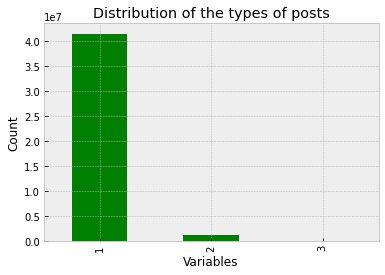

In [ ]:
posts["post_type"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of the types of posts")
plt.xlabel("Variables")
plt.ylabel("Count")
plt.show()

From the chart we can see that most of the posts in our dataset are photos.

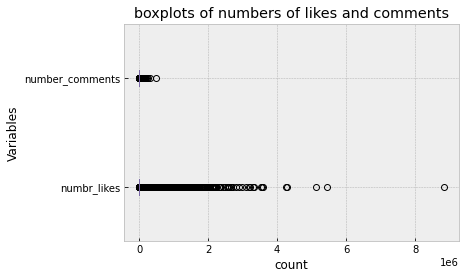

In [ ]:
posts[['numbr_likes', 'number_comments']].boxplot(vert = False, grid = True)
plt.title("boxplots of numbers of likes and comments")
plt.ylabel("Variables")
plt.xlabel("count")
plt.show()

Also in this boxplot we can see the dispersion noted by analyzing the metrics before.

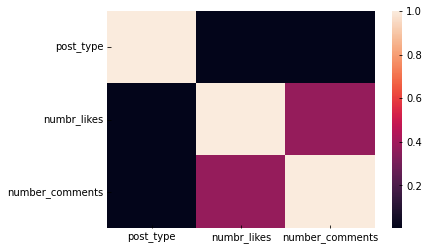

In [ ]:
sns.heatmap(posts[['post_type', 'numbr_likes', 'number_comments']].corr())
plt.show()

We plotted the correlation matrix between `post_type`, `numbr_likes` and `number_comments`. Analyzing the heatmap we can see that the only link present between the variables is between the number of likes and comments, with a correlation of about 0.4.

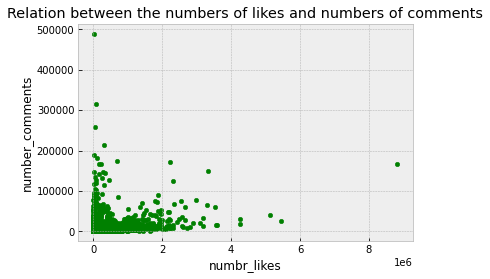

In [ ]:
posts[['numbr_likes', 'number_comments']].plot.scatter(x='numbr_likes',y='number_comments', c='green')
plt.title("Relation between the numbers of likes and numbers of comments")
plt.show()

From the chart, we can find a match for the previously mentioned relationship.

In [ ]:
del posts

# Dataframes names:

In [ ]:
instagram_profiles = "instagram_profiles.zip"
instagram_locations = "instagram_locations.zip"
instagram_posts = "instagram_posts.zip"

#instagram_profiles = "profiles.csv"
#instagram_locations = "locations.csv"

# RQ2:

## 1. Plot the number of posts for each profile in descending order.

In [ ]:
df = pd.read_csv(instagram_profiles, delimiter='\t', low_memory=True)
display(df[['profile_id', 'profile_name', 'n_posts']].sort_values(by='n_posts', ascending=False))

# Clear Memory
del df

,profile_id,profile_name,n_posts
3990597,1.996648e+08,jasem33312,183730.0
2571613,8.563367e+09,koenigpic,142428.0
4339208,1.273455e+09,rudyanto62,126340.0
3942413,9.813508e+06,hometown_ni,125220.0
4219927,1.607309e+09,dwfitfiber_thailand,117262.0
...,...,...,...
4386128,3.673858e+07,waskaz,NaN
4386129,NaN,NaN,NaN
4386130,2.390000e+02,9827,NaN
4498764,2.020394e+08,piteapeter,NaN


## 2. What posts have the highest number of "likes"?

In [ ]:
df = pd.read_csv(instagram_posts, sep='\t', usecols=['post_id', 'numbr_likes'], low_memory=True)
display(df.sort_values(by='numbr_likes', ascending=False).head(5))

# Clear Memory
del df

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0


## 3. What posts have the most and the least number of comments?

In [ ]:
df = pd.read_csv(instagram_posts, sep='\t', usecols=['post_id', 'number_comments'], low_memory=True)

print("Display post with the maximum number of comments.")
display(df.loc[df['number_comments'].idxmax()])

print("Display post with the minimun number of comments.")
display(df.loc[df['number_comments'].idxmin()])

# Clear Memory
del df

Display post with the maximum number of comments.


post_id            Bx2sPAjHviO
number_comments       488953.0
Name: 41873060, dtype: object

Display post with the minimun number of comments.


post_id            BXdjjUlgcgq
number_comments            0.0
Name: 0, dtype: object

## 4. How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

Number of posts with location: 29737425
Number of posts with no location: 12972772
Number of total posts: 42710197
Percentage of posts with tagged locations over non-tagged ones: 69.63%


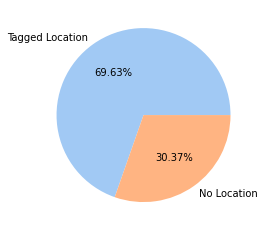

In [ ]:
df = pd.read_csv(instagram_posts, delimiter='\t', usecols=['location_id'], low_memory=True)
n_nan = df['location_id'].isna().sum()
tot_posts = len(df['location_id'])

print(f'Number of posts with location: {tot_posts-n_nan}')
print(f'Number of posts with no location: {n_nan}')
print(f'Number of total posts: {tot_posts}')
print(f'Percentage of posts with tagged locations over non-tagged ones: {((tot_posts-n_nan)/tot_posts)*100:.2f}%')

colors = sns.color_palette('pastel')[0:2]
plt.pie([tot_posts-n_nan, n_nan], labels=['Tagged Location', 'No Location'], colors=colors, autopct='%.2f%%')
plt.show()

# Clear memory
del df, n_nan, tot_posts, colors

We find out that less than one third of the posts in the dataset are without a tagged location, this is clearly visible by the pie chart:
- In blue are the **Tagged Location** with 69.93%.
- In orange are the **No location** with 30.37%.

## 5. How many posts include only photos? How many also have videos?

Number of posts with only photo: 41534486
Number of posts with only video: 1134768
Number of posts with photo and video: 40943
Number of total posts: 42710197


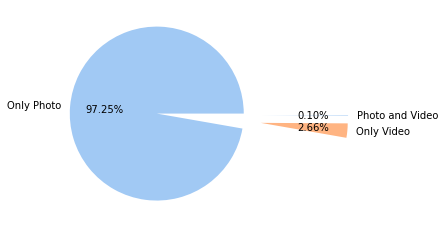

In [ ]:
df = pd.read_csv(instagram_posts, delimiter='\t', usecols=['post_type'], low_memory=True)
results = df.post_type.value_counts()

print(f'Number of posts with only photo: {results[1]}')
print(f'Number of posts with only video: {results[2]}')
print(f'Number of posts with photo and video: {results[3]}')
print(f'Number of total posts: {results[1]+results[2]+results[3]}')

colors = sns.color_palette('pastel')[0:2]
explode = (0.2, 1, 1)
plt.pie([results[1], results[2], results[3]], labels=['Only Photo', 'Only Video', 'Photo and Video'], colors=colors, autopct='%.2f%%', explode=explode)
plt.show()

# Clear memory
del df, colors, results, explode

## 6. What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

Let's visualize the percentage between business account and non-business:

Number of business account: 855253
Number of non-business account: 3654623
Number of total account: 4509876
Percentage of business account over non-business: 18.96%


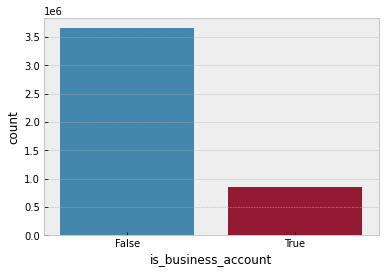

In [ ]:
df = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['is_business_account'], low_memory=True)
n_business = df['is_business_account'].sum()
tot_profiles = len(df['is_business_account'])

print(f'Number of business account: {n_business}')
print(f'Number of non-business account: {tot_profiles-n_business}')
print(f'Number of total account: {tot_profiles}')
print(f'Percentage of business account over non-business: {(n_business/tot_profiles)*100:.2f}%')

sns.countplot(data=df, x='is_business_account')

# Clear Memory
del df, n_business, tot_profiles

**Interpretation**: It seems that people mostly open a non-business account, this seems reasonable because normal users use Instagram for personal usage.

# RQ3:

To deal with timestamps, we have to initially convert the cts column values by using the `to_datetime` module provided by the `pandas` library

In [ ]:
posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['cts'], low_memory=True)
posts.cts = pd.to_datetime(posts.cts)

## 1. Most common times of publishing posts

To solve this question, we may be interested in finding at which hour of the day people are most active in publishing posts. 

We create a column called `Time` which contains the time (expressed in hours, minutes and seconds) by applying the `.dt.time` attribute to the `cts` column.

Then, since we are interested in finding the most common time of the day, we create the column `rounded_Time` which contains the rounded values of the column `Time` (rounded every 30 minutes).

In [ ]:
posts['Time'] = posts.cts.dt.time
posts['rounded_Time']=pd.to_datetime(posts.cts).dt.round("30min").dt.time

Since we want to know the most frequent hour of the day, we can use the `mode` function.

In [ ]:
posts['rounded_Time'].mode()

0    20:00:00
dtype: object

Hence, we can answer that, as we computed, the most frequent time at which people publish posts is between 20:45 and 21:15.

Furthermore, we may want to have a more visual idea by plotting the histogram of the values of a new column `hour` representing the truncated hours of the `cts` column. 

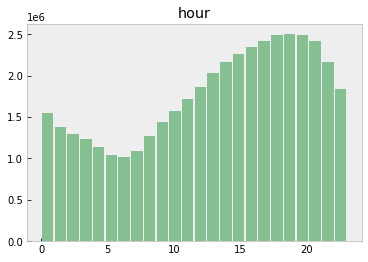

In [ ]:
posts['hour'] = posts.cts.dt.hour
posts.hist(column='hour', bins=24, grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

##### Solution: From the analysis, it emerges that people post most frequently around 19:00.

## 2. Create a function F that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [ ]:
def plot_interval(intervals: List[List[str]],
                  dataframe: pd.DataFrame) -> None:
  """Plot the intervarls.

  Args:
    - intervals (List[List[str]]): The intervals to plot.
    - dataframe (pd.DataFrame): The dataframe to work on.

  Returns:
    - None
  """
  for interval in intervals:
    initial_time = datetime.strptime(interval[0], '%H:%M:%S').time()
    final_time = datetime.strptime(interval[1], '%H:%M:%S').time()
    x = dataframe[(dataframe['Time']>= initial_time) & (dataframe['Time']<= final_time)].Time
    plt.bar(f'{interval[0][0:2]}-{int(interval[1][0:2])+1}', len(x))

## 3. Apply F to the given intervals

In [ ]:
intervals = [['06:00:00','10:59:59'],
             ['11:00:00','13:59:59'],
             ['14:00:00','16:59:59'],
             ['17:00:00','19:59:59'],
             ['20:00:00','23:59:59'],
             ['00:00:00','02:59:59'],
             ['03:00:00','05:59:59']]         

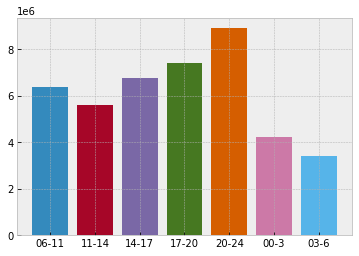

In [ ]:
plot_interval(intervals, posts)

In [ ]:
# Clean Memory
del posts

# RQ4


## 1. Write a function that, given a `profile_id`, will be able to return the posts that belong to the given `profile_id`.

In [ ]:
def get_posts(profile_id: int,
              dataframe: pd.DataFrame) -> List[str]:
  """Given a profile id, this function returns a list containing the
  identifying string of posts associated with that user. 

  Args:
    - profile_id (int): The profile id of the user.
    - dataframe (pd.DataFrame): The dataframe.

  Returns:
    - List : The list containing the user's posts. 
  """
  return(dataframe.post_id[dataframe.profile_id == profile_id].tolist())

In [ ]:
# an example
posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'post_id'], low_memory=True)
print(get_posts(2237947779, posts))

# Clear Memory
del posts

['BXdjjUlgcgq', 'BeyPed5hKj9', 'Bunhd1DFVAG', 'Bppi85gliQK', 'BuDfIyslzfw', 'BxJsMDpA2yH', 'Bt5LFpZlm3z', 'BxZIzaQhS-o', 'BxRZvS0gPIA', 'BwygkNCAShv', 'Bwm7hEKHBzs', 'BwYuE0cghyB', 'BwGuhAoFSWj', 'BwBj2vhFuGH', 'Bw_XgfXA9YT', 'Bw3nuV6ACyY', 'BwJS1H9lfiJ', 'Bf6avRfheG1', 'BxMRhd2Ajgm', 'Be93_r7Bnhq', 'BtNaOjolj_n', 'BkMhROUhNbu', 'BeOMICahv0d', 'BeUrXsoB0ou', 'BvLnQ5QFHAs', 'BrZjxHllTd9', 'BeCp_INhyoh', 'BqjeI31lw-y', 'BoQpcWQB-gC', 'Bn1k1odAXa5', 'BmaTjjpBTG9', 'BmNSg2ih5ex', 'BkjvPM1Bpxa', 'Bg22N6AhebK', 'BgS2rd4BozM', 'Bc6jrZIHttD', 'BgDZmg1D0If', 'Bf-QTObhSmW']


## 2. Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.


In [ ]:
def get_ntop(n: int) -> List[List[str]]:
  """The function will return the posts that belong to the n top posted profiles.

  Args:
    - n (int): how many profiles to check.

  Returns
    - result (List[List[str]]): A list containing the post list for each profile.
  """
  profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'n_posts'], low_memory=True)
  posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'post_id'], low_memory=True)
  result = []

  for profile in profiles.sort_values(by='n_posts', ascending=False).head(n).profile_id.tolist():
    result.append(get_posts(profile, posts))
  
  return result

In [ ]:
# an example
get_ntop(10)

[['Bq3hP3Khp8J',
  'Bq3hN53hUsD',
  'BCqCe9LypeF',
  '20Wu4zypd2',
  'BrKq76AhadU',
  'Bq_MjFzB_Wt',
  'Bq_MiKhhP05',
  'BpQ2cmKF-W0',
  '3V4OeXypTT',
  'BzUmjr2pgni',
  'BzUmictJSO1',
  'BzUmhW0pjrN',
  'BzUmgscJEK4',
  'BzUmgBYJzoS',
  'BzUmfZspDqA',
  'BzUmejDptYx',
  'BzUmdnupYxW',
  'BzUmcZRpTTn',
  'BzScUjhJiwK',
  'BzRkojLJBMQ',
  'BzRkmb3JXea'],
 ['BxJpvMrpl0n',
  'BxJpeX2pXeN',
  'BxJptNSpk6g',
  'BxJpzW4J6Aq',
  'BxJpgQMJa66',
  'BxJp2qgpVJo',
  'BxJpxSLp4rB',
  'BxJpcZ0JRqN',
  'BxJp4i3pArJ',
  'BxJpq3dppxY',
  'BxJp6dVJvtO',
  'BxJposzpeA7',
  'BxJpmohpwK2',
  'BxJpkrrJ0b3',
  'BxJpijSJd_f'],
 ['BpfufadAl1f',
  'Bz6mD1VpaJB',
  'BuCyAT8Abu3',
  'BxD_1nXgoBG',
  'BvYZl1yAubo',
  'BrkhuwcATjv',
  'BwMTtZ5g4RY',
  'Brt9v5VATSp',
  'Bx7F9xKJCN2',
  'BvNCnhMgdAl',
  'ByBp307pDMh',
  'ByPPM0Mps4a',
  'ByPPFlhJrbA',
  'Bz7fTyVpLLQ',
  'Bz7a1vgJzl2',
  'Bz6mutIJCHA',
  'Bz6mkhBpul2',
  'Bz6mbkwHeJJ',
  'Bz6mHZFp3zI',
  'Bz6mAlXpyCK',
  'Bz6l-HkpF8G',
  'Bz6lo6RpKQF',
  'Bz6VVamJ73y

## 3. What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'n_posts'], low_memory=True)
top_prof = profiles.sort_values(by=['n_posts'],ascending=False).head(10).profile_id

# Clear some memory
del profiles

posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'numbr_likes', 'number_comments'], low_memory=True)

df = pd.merge(top_prof, posts, on='profile_id')

# Clear some memory
del posts, top_prof

print("Average for each profile")
display(df[['profile_id', 'numbr_likes', 'number_comments']].groupby('profile_id').mean())

print("Average for all")
display(df[['numbr_likes', 'number_comments']].mean())

# Clear the memory
del df

Average for each profile


,numbr_likes,number_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
8.563367e+09,0.000000,0.000000


Average for all


numbr_likes        3.171348
number_comments    0.033708
dtype: float64

## 4. Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

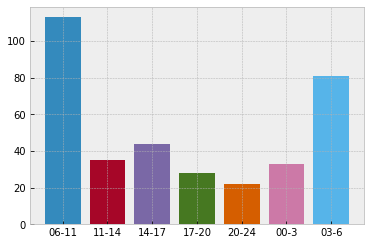

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'n_posts'], low_memory=True)
top_prof = profiles.sort_values(by=['n_posts'],ascending=False).head(10).profile_id

# Clear some memory
del profiles

posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'cts'], low_memory=True)

df = pd.merge(top_prof, posts, on='profile_id')

# Clear some memory
del posts, top_prof

df.cts = pd.to_datetime(df.cts)
df['Time'] = df.cts.dt.time

plot_interval(intervals, df)

# Clear Memory
del df

**Interpretation**:
We can see that most of the posts for these top 10 profiles are published between the 6:00 and the 11:00. The second interval with the most number of published post is 3:00 to 6:00.

# RQ5:

### 1. Plot the top 10 most popular users in terms of followers and their number of posts.

In [ ]:
df = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_name', 'followers', 'n_posts'], low_memory=True)
display(df.sort_values(by='followers', ascending=False).head(10))
del df

,profile_name,followers,n_posts
2880218,instagram,285457645.0,5760.0
2582507,victoriassecret,65269440.0,7355.0
3820939,nba,35339708.0,28816.0
701965,louisvuitton,30689316.0,3352.0
2414951,buzzfeedtasty,30246783.0,2791.0
2785241,andresiniesta8,29542143.0,990.0
333193,hm,29176804.0,4566.0
3934581,princessyahrini,29042823.0,4719.0
1311970,danbilzerian,26476004.0,1311.0
1703764,akshaykumar,26252169.0,1173.0


### 2. Who is the most influential user?

Given the definition of **Influential Users** as:
> The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

The most influeantial user then is **instagram**, because it has the largest number of followers.

In [ ]:
df = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_name', 'followers', 'n_posts'], low_memory=True)
display(df.iloc[df['followers'].idxmax()])
del df

profile_name      instagram
followers       285457645.0
n_posts              5760.0
Name: 2880218, dtype: object

### 3. Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

Sydney, Australia         9
Victoria's Secret         4
Kobe-shi, Hyogo, Japan    3
Wells Fargo Center        2
Bel-Air Estate            2
Name: name, dtype: int64

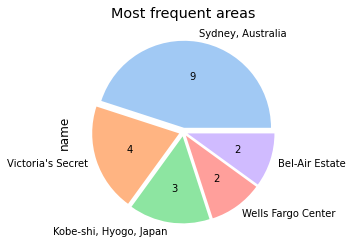

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'profile_name', 'followers'], low_memory=True)
most_inf_users = profiles.sort_values(by='followers', ascending=False).head(10)

# Clear some memory
del profiles

locations = pd.read_csv(instagram_locations, delimiter='\t', usecols=['id', 'name'], low_memory=True)
posts = pd.read_csv(r"instagram_posts.zip", delimiter='\t', usecols=['profile_id', 'location_id'], low_memory=True)

profiles_posts = pd.merge(most_inf_users, posts, on='profile_id')

# Clear some memory
del posts, most_inf_users

df = pd.merge(profiles_posts, locations, left_on='location_id', right_on='id')

# Clear some memory
del profiles_posts, locations

n = 5
colors = sns.color_palette('pastel')[0:n]
explode = tuple([0.05]*n)

display(df['name'].value_counts().head(n))

df['name'].value_counts().head(n).plot(kind='pie', autopct=lambda x: '{:.0f}'.format(x*df['name'].value_counts().head(n).sum()/100), colors=colors, explode=explode, title="Most frequent areas")

# Clear Memory
del df, n

### 4. How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

1    128
2     13
Name: post_type, dtype: int64

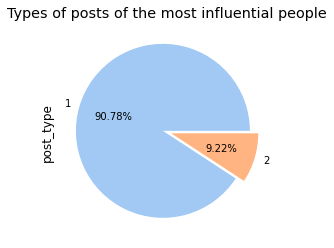

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'followers'], low_memory=True)
most_inf_users = profiles.sort_values(by='followers', ascending=False).head(10)

# Clear some memory
del profiles

posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'post_type'], low_memory=True)

profiles_posts = pd.merge(most_inf_users, posts, on='profile_id')

# Clear some memory
del posts, most_inf_users

results = profiles_posts.post_type.value_counts()

# Clear some memory
del profiles_posts

results.replace(to_replace={1: 'Only Photo', 2: 'Reels', 3: 'Photo and Video'}, inplace=True)

display(results)

n = len(results.unique())
colors = sns.color_palette('pastel')[0:n]
explode = tuple([0.05]*n)

# Clear some memory
del n

results.plot(kind='pie', colors=colors, autopct='%.2f%%', title='Types of posts of the most influential people', explode=explode)
plt.show()

del colors, results, explode

**Interpretation**: As we can see for the most influential people the main typology of post is Photo. There are also post with only videos, but none mixed. 

### 5. How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

Sum of likes for post type


post_type
Only Photo    69285634.0
Reels          3464814.0
Name: numbr_likes, dtype: float64


Average number of likes for post type


post_type
Only Photo    541294.015625
Reels         266524.153846
Name: numbr_likes, dtype: float64

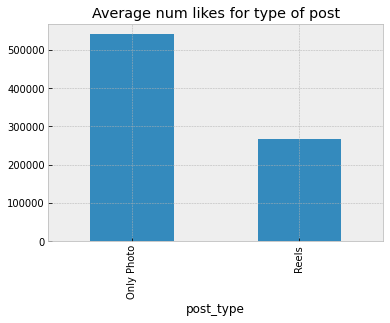

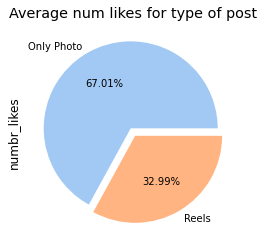

####################################################################################################
Sum of comments for post type


post_type
Only Photo    497013.0
Reels          26258.0
Name: number_comments, dtype: float64


Average number of comments for post type


post_type
Only Photo    3882.914062
Reels         2019.846154
Name: number_comments, dtype: float64

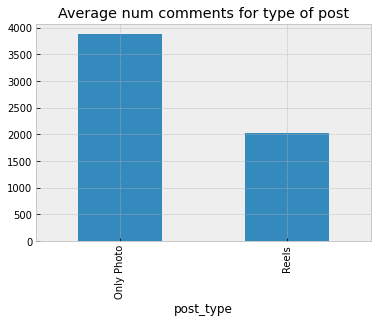

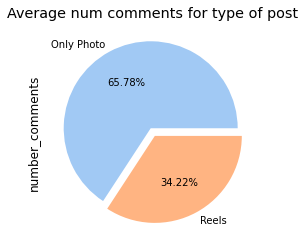

####################################################################################################
Sum of followers for post type


post_type
Only Photo    1.187811e+10
Reels         1.250739e+09
Name: followers, dtype: float64


Average followers for post type


post_type
Only Photo    9.279774e+07
Reels         9.621068e+07
Name: followers, dtype: float64

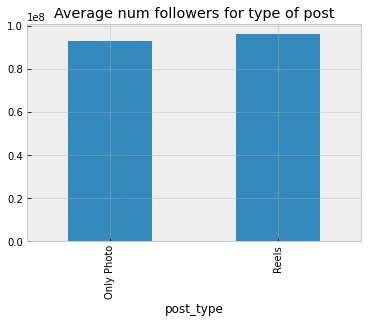

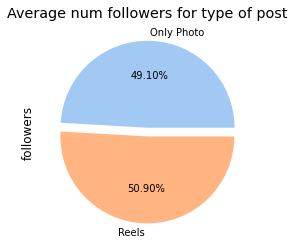

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id', 'followers'], low_memory=True)
most_inf_users = profiles.sort_values(by='followers', ascending=False).head(10)

# Clear some memory
del profiles

posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'post_type', 'numbr_likes', 'number_comments'], low_memory=True)

profiles_posts = pd.merge(most_inf_users, posts, on='profile_id')

# Clear some memory
del most_inf_users, posts

profiles_posts.replace(to_replace={1: 'Only Photo', 2: 'Reels', 3: 'Photo and Video'}, inplace=True)

n = len(profiles_posts['post_type'].unique())
colors = sns.color_palette('pastel')[0:n]
explode = tuple([0.05]*n)

# Clear some memory
del n

print("Sum of likes for post type")
display(profiles_posts.groupby(['post_type'])['numbr_likes'].sum())

grouped_mean = profiles_posts.groupby(['post_type'])['numbr_likes'].mean()

print()
print("Average number of likes for post type")
display(grouped_mean)
grouped_mean.plot(kind='bar', title="Average num likes for type of post", y="Number of likes")
plt.show()
print()
grouped_mean.plot(kind='pie', colors=colors, autopct='%.2f%%', title='Average num likes for type of post', explode=explode)
plt.show()

print("#"*100)
print("Sum of comments for post type")
display(profiles_posts.groupby(['post_type'])['number_comments'].sum())

comments_mean = profiles_posts.groupby(['post_type'])['number_comments'].mean()

print()
print("Average number of comments for post type")
display(comments_mean)
comments_mean.plot(kind='bar', title="Average num comments for type of post", y="Number of comments")
plt.show()
print()
comments_mean.plot(kind='pie', colors=colors, autopct='%.2f%%', title='Average num comments for type of post', explode=explode)
plt.show()

print("#"*100)
print("Sum of followers for post type")
display(profiles_posts.groupby(['post_type'])['followers'].sum())

followers_mean = profiles_posts.groupby(['post_type'])['followers'].mean()

# Clear some memory
del profiles_posts

print()
print("Average followers for post type")
display(followers_mean)
followers_mean.plot(kind='bar', title="Average num followers for type of post", y="Number of followers")
plt.show()
print()
followers_mean.plot(kind='pie', colors=colors, autopct='%.2f%%', title='Average num followers for type of post', explode=explode)
plt.show()

# Clear Memory
del colors, explode, grouped_mean, followers_mean, comments_mean

**Explanation**: Looking at the charts we can say that in terms of number of likes or comments the best strategy is to post mostly only photo posts, while in terms of followers going for only photos or reel is not important.
It is also important to notice that none of the most influential profiles have published mixed type of posts.

# RQ6:

## 1. What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

As usual, we import the dataset with the needed columns and then we convert the cts colum using the correct pandas function.

In [ ]:
posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id','cts'], low_memory=True)
posts.cts=pd.to_datetime(posts.cts)

In [ ]:
posts.drop_duplicates(inplace=True)
posts.dropna(inplace=True)

We are interested in find the first and the last date at which each user publishes the posts and the number of posts published between these two dates.

In [ ]:
h=posts.groupby('profile_id').agg({'cts':['count','min','max']})

In [ ]:
del posts

Furthermore we want to delete all rows that have only 1 post.

In [ ]:
h1=h[h['cts']['count']!= 1]

In [ ]:
del h

We created a new column in our dataset that represents the average time that passes before the users post on Instagram. Given that computing the exact mean was too complex in terms of time, we decided to opt for an approximation.

In [ ]:
h1['avg']= (h1['cts']['max']-h1['cts']['min'])/(h1['cts']['count'])

In [ ]:
h1

cts                                          \
             count                 min                 max   
profile_id                                                   
3.000000e+00    14 2010-07-19 01:12:23 2013-02-02 22:02:59   
4.000000e+00    37 2010-07-22 12:19:51 2019-05-05 08:03:36   
1.100000e+01     2 2019-04-18 23:21:22 2019-04-25 06:50:14   
1.900000e+01    51 2010-10-23 18:48:33 2019-04-17 07:44:13   
2.300000e+01     2 2015-11-19 08:57:39 2016-10-08 00:06:29   
...            ...                 ...                 ...   
1.521107e+10     4 2019-06-21 17:52:29 2019-06-21 20:41:59   
1.523330e+10     3 2019-06-26 23:56:47 2019-06-27 00:11:09   
1.566695e+10    11 2019-07-29 21:36:32 2019-08-06 01:01:31   
9.001013e+13    10 2017-06-22 10:56:54 2018-04-04 09:53:28   
9.001013e+13     2 2019-04-12 21:25:36 2019-04-12 21:39:06   

                                    avg  
                                         
profile_id                               
3.000000e+00 66 days 10:03:36.857142857  
4.000000e+00 86 days 17:23:53.108108108  
1.100000e+01            3 days 03:44:26  
1.900000e+01 60 days 17:39:54.901960784  
2.300000e+01          161 days 19:34:25  
...                                 ...  
1.521107e+10     0 days 00:42:22.500000  
1.523330e+10  0 days 00:04:47.333333333  
1.566695e+10  0 days 15:34:59.909090909  
9.001013e+13    28 days 14:17:39.400000  
9.001013e+13            0 days 00:06:45  

[4354633 rows x 4 columns]

We sorted the dataframe h in ascending order by the frequence of posting

In [ ]:
h1_s = h1.sort_values(by='avg', ascending=True)

In [ ]:
del h1

In [ ]:
h1_s

cts                                          \
             count                 min                 max   
profile_id                                                   
6.927588e+08     2 2019-04-25 05:39:05 2019-04-25 05:39:06   
1.452168e+09     2 2014-08-06 16:07:38 2014-08-06 16:07:39   
8.574180e+09     2 2019-02-12 06:27:49 2019-02-12 06:27:50   
3.664505e+09     2 2019-03-14 15:48:07 2019-03-14 15:48:08   
6.708224e+09     2 2017-12-10 07:18:55 2017-12-10 07:18:56   
...            ...                 ...                 ...   
4.797160e+06     2 2011-06-06 16:25:59 2019-05-06 10:44:05   
6.580000e+04     2 2011-05-07 02:29:49 2019-05-29 07:48:53   
9.905660e+05     2 2011-03-15 18:33:27 2019-05-05 00:35:34   
1.224550e+05     2 2010-10-25 19:23:28 2019-04-09 03:46:35   
6.912610e+05     2 2010-12-15 19:51:40 2019-06-02 21:26:17   

                                   avg  
                                        
profile_id                              
6.927588e+08    0 days 00:00:00.500000  
1.452168e+09    0 days 00:00:00.500000  
8.574180e+09    0 days 00:00:00.500000  
3.664505e+09    0 days 00:00:00.500000  
6.708224e+09    0 days 00:00:00.500000  
...                                ...  
4.797160e+06        1445 days 09:09:03  
6.580000e+04        1472 days 02:39:32  
9.905660e+05 1486 days 03:01:03.500000  
1.224550e+05 1543 days 16:11:33.500000  
6.912610e+05 1545 days 12:47:18.500000  

[4354633 rows x 4 columns]

In [ ]:
print(h1_s['avg'].mean())

46 days 10:14:21.953429565


So, we found that the average time is equal to 46 days more or less

In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['followers','following','profile_id'], low_memory=True)
profiles = profiles.set_index(['profile_id'])

In [ ]:
df=pd.merge(h1_s, profiles, left_index=True, right_index=True)

In [ ]:
df.columns=['count','min','max','avg','following','followers']

In [ ]:
top3=df.sort_values(by='avg').head(3)

In [ ]:
display(top3[['avg','following','followers']])

,avg,following,followers
profile_id,,,
9.227593e+09,0 days 00:00:00.500000,7410.0,232.0
6.708224e+09,0 days 00:00:00.500000,1958.0,77.0
6.813541e+09,0 days 00:00:00.500000,338.0,10.0


In [ ]:
del df, top3, h1_s

**Insight**: We think that being the average so low, maybe these profiles are new users or people that tends to publish posts in blocks.

## 2. Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.


In [ ]:
intervals

[['06:00:00', '10:59:59'],
 ['11:00:00', '13:59:59'],
 ['14:00:00', '16:59:59'],
 ['17:00:00', '19:59:59'],
 ['20:00:00', '23:59:59'],
 ['00:00:00', '02:59:59'],
 ['03:00:00', '05:59:59']]

We followed the same procedure as before in RQ3. We do it for a section of the dataset (only 100'000 of rows) for time issues, but the code can be run without RAM problems even on the entire dataset.

In [ ]:
posts=posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['cts','numbr_likes','number_comments'], low_memory=True, nrows = 1000000)
posts.cts = pd.to_datetime(posts.cts)
posts['Time'] = posts.cts.dt.time

We decided to implement a new function called `get_interval()` for handling this section: 








In [ ]:
def get_intervals(time,
                  intervals: List[List[str]] = intervals) -> str:
  """This function takes as input a dt.time time and a list of intervals, and returns the corresponding time interval.
  
  Args:
    - time (dt.time): The time in which the post was published.
    - intervals (List[List[str]]): The list of intervals. Default intervals.
    
  Returns:
    - interval (str): The corresponding interval.
  """
  for interval in intervals:
    
    initial_time = datetime.strptime(interval[0], '%H:%M:%S').time()
    final_time = datetime.strptime(interval[1], '%H:%M:%S').time()

    if time >= initial_time and time <= final_time:
      return interval[0]

In [ ]:
posts['interval']=posts['Time'].apply(get_intervals)

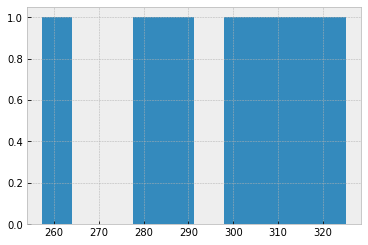

In [ ]:
posts.groupby('interval')['numbr_likes'].mean().hist()
plt.show()

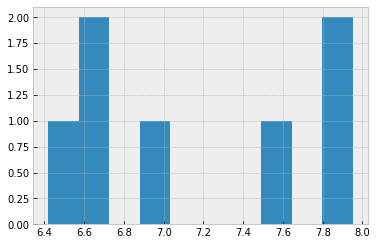

In [ ]:
posts.groupby('interval')['number_comments'].mean().hist()
plt.show()

# RQ7

#### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

For answer to that question we used the classical definition of probability:
$\frac{\text{Favorable events}}{\text{Total events}}$, that in our case means $\frac{\text{#Posts in which: likes} >=  ( 0.2*\text{n_followers})  }{\text{#Total posts}}$

In [ ]:
# First, we select only the useful columns and  drop the NAs in both datasets
f_s = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['profile_id','followers'], low_memory=True).dropna()
l_s = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'numbr_likes'], low_memory=True).dropna() 

In [ ]:
f = pd.merge(l_s, f_s) # merging the two datasets

We merged the datasets using the column `profile_id`

In [ ]:
numerator=len(f[f.numbr_likes>=(0.2*f.followers)]) # the profiles that has more than 20% likes in respect to the number of followers
denominator=len(f) # all the profiles

As reported above, we want to apply the classical definition of probability, so identification of the numerator and denominator of the fraction is necessary.

For the denominator, we consider all rows of the dataset `l_s`, i.e., all the posts (where we have obviously eliminated NAs).

Instead, to get to the numerator, after creating a subset from the original dataset considering only favorable events (i.e., posts where the number of post likes exceeds at least 20% of the number of followers), we consider all rows in this subset.

In [ ]:
probability=(numerator/denominator)*100 # classical definition of probability
print(probability)

15.874918105582807


The probability that a post receives more than 20% "likes" of the number of followers a user has is more or less 16%
It is a resonable probability, infact considering how Instagram normally works, this percentage turns out to make sense.



In [ ]:
del f_s
del l_s
del f
del numerator
del denominator
del probability

#### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

As before, for answer to that question we used the classical definition of probability:
$\frac{\text{Favorable events}}{\text{Total events}} = \frac{\text{For each user, how many times has he or she returned to a place at least once} }{\text{All the distinct pairs (profile_id, location) for each user}}$

To better explain our strategy, we give an example:
User x has posted 5 posts in which in 3 there are all different locations (Viterbo, Latina, Frosinone), and the remaining two are located in Rome in the same place. 
The numerator of our formula will be equal to 1 since it counts how many times a user has returned to a place at least once. The denominator will have to be equal to 4 since it represents all the distinct pairs (profile_id, location) of the user we have considered, so $Probability= \frac{1}{4}$

In [ ]:
# selecting only the usefull columns and drop the NAs
l = pd.read_csv(instagram_posts, delimiter='\t', usecols=['profile_id', 'location_id'], low_memory=True).dropna()
# change the type into int
l.profile_id = l.profile_id.astype(int)
l.location_id = l.location_id.astype(int)

In [ ]:
numerator2 = np.sum((l.groupby(['profile_id','location_id']).size() > 1)) # the number of duplicates rows in our dataset
denominator2 = l.drop_duplicates().shape[0] # the number of all possible couples (user,location) without duplicates

In [ ]:
probability2 = (numerator2/denominator2)*100 # classical definition of probability
print(probability2)

14.040979544357295


The value we derive might make sense from a practical and logical point of view, in fact it makes sense for a user to return to a place with that probability not too high.
However, from a purely probabilistic point of View, the way this formula is constructed, there could be some problems: the fact that we do not give importance to how many times a user returns to the place. Indeed, if for example user y publishes 100 posts, of which 99 in the same location and only 1 in a new place, the probability would be only 50%. In other words we are completely forgetting that as many as 99 times he has returned to the same place.
From our point of view an improvement to the formula could be to add a weight that takes into account each time the user returns to the same location, to better balance the result. 

In [ ]:
del probability2
del l
del numerator2
del denominator2

# RQ8

## 1. Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [ ]:
posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['numbr_likes', 'number_comments'], low_memory=True)
posts.dropna(inplace=True) # drop the NAs

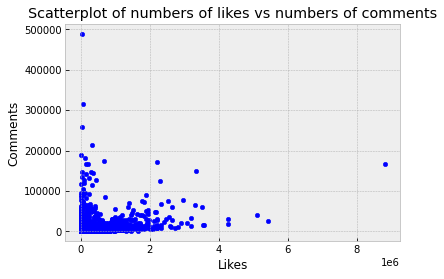

In [ ]:
posts[['numbr_likes', 'number_comments']].plot.scatter(x='numbr_likes', y='number_comments') 
plt.title("Scatterplot of numbers of likes vs numbers of comments")
plt.ylabel("Comments")
plt.xlabel("Likes")
plt.show()

Text(0, 0.5, 'Log(comments)')

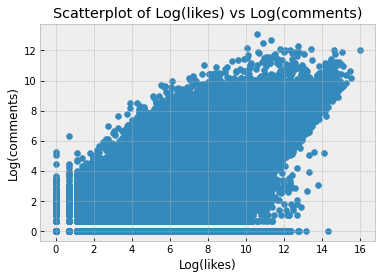

In [ ]:
l_likes =  posts.numbr_likes.apply(lambda x : np.log(x+1))
l_comments =  posts.number_comments.apply(lambda x : np.log(x+1))
plt.scatter(l_likes, l_comments)
plt.title("Scatterplot of Log(likes) vs Log(comments)")
plt.xlabel('Log(likes)')
plt.ylabel('Log(comments)')
plt.show()

In [ ]:
scipy.stats.pearsonr(posts.numbr_likes, posts.number_comments)

(0.37445279924812225, 0.0)

We decided to report the scatter plot between likes and comments in both regular scale and log-log scale to understand the relationship better.It is therefore possible to note the existence of a link(as we had previously mentioned in question RQ1).
From the Pearson correlation coefficient we can say that there is a positive relationship between the number of likes and comments. Regarding the p-value on the other hand, we should not give it too much importance since the sample size is extremely high
 Anyway, statistically speaking it is worth remembering that correlation is not causation: seeing two variables moving together does not necessarily mean knowing whether one variable causes the occurrence of the other.

In [ ]:
del posts

## 2. Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [ ]:
posts = pd.read_csv(instagram_posts, delimiter='\t', usecols=['cts', 'numbr_likes'], low_memory=True)
posts.dropna(inplace=True)
posts.cts = pd.to_datetime(posts.cts)

We used the Pearson correlation to test for the existence of a relationship between the two variables. in particular, we relied on the scipy package, which allows through the pearson test to have not only the correlation coefficient between the two variables but also the p-value that supports the test.

In [ ]:
scipy.stats.pearsonr(posts.numbr_likes, posts.cts.dt.hour)

From the result it is possible to say that there is no some obvious relationship between these two variables: in fact, the correlation coefficient is very low, close to zero. Moreover, the p-value is extremely small.
Typically a low p-value leads to the rejection of the null hypothesis, but if the observations in a dataset are extremely high, the p-value tends to be very small under all circumstances. So in our case we should not give too much weight to the p-value.

In [ ]:
size=1000000
sample=posts.sample(n=size, random_state=1) # we use random_state to ensure the reproducibility.
scipy.stats.pearsonr(sample.numbr_likes, sample.cts.dt.hour)

(0.0008323690546830639, 0.4052011688894766)

To support our position on p-value, by randomly selecting 100000 rows from the full dataset, we can see that the correlation coefficient always remains trending toward zero, but in this case the p-value is extremely larger than before

In [ ]:
del posts
del size
del sample

## 3. What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.


In [ ]:
profiles = pd.read_csv(instagram_profiles, delimiter='\t', usecols=['followers','profile_id'], low_memory=True)
profiles.dropna(inplace=True) # discard all Nas in our subset

In [ ]:
profiles.followers.describe().astype(int)

count      3447698
mean          4745
std         194051
min              0
25%            159
50%            406
75%            974
max      285457645
Name: followers, dtype: int64

In [ ]:
profiles.followers.mode().astype(int)

0    0
dtype: int64

By analyzing the various metrics reported above, we can deduce various information:

1. we lost about 1 million observations by removing NAs from the dataset.

2. the average number of followers is about 10 times larger than the median, which makes us realize that there are some accounts with extremely high numbers of followers, which heavily affect the average. So we expect an asymmetric distribution.

3. The mode is equal to zero. This might be because there could be many fake or unused profiles in Instagram.

4. From the IQR range (Q3-Q1) it can be said that half of the users have between 159 and 974 followers. If we look at the maximum number of followers in the dataset, which is 285457645, we can claim that there is a lot of dispersion between the third quantile and the maximum number of followers. 

Thus, a long right tail of the distribution can be expected, with a few individuals having a huge amount of followers

In [ ]:
profiles.followers = profiles.followers.apply(lambda x : np.log(x+1)) # As before log(0) does not exist, we have to add 1 to all values to maintain proportions and make zeros disappear

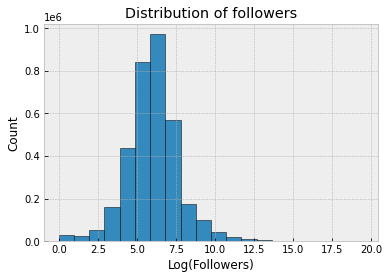

In [ ]:
plt.hist(profiles.followers.tolist(), bins=20, edgecolor="black")
plt.title('Distribution of followers')
plt.xlabel('Log(Followers)')
plt.ylabel('Count')
plt.show()

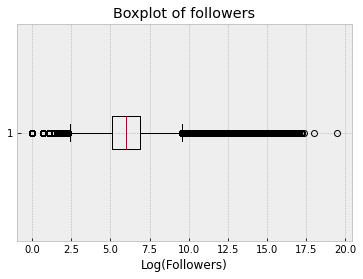

In [ ]:
plt.boxplot(profiles.followers.tolist(),vert=False)
plt.title('Boxplot of followers')
plt.xlabel('Log(Followers)')
plt.show()

In order to improve the interpretation of the graphs, we decided to add 1 to the number of followers of individual users in order to apply the natural logarithm to it. The logarithmic scale is used when a variable has high dispersion in order to decrease differences. We can say that what was said about the metrics reported earlier (mean, median, mode etc.) is reflected in the graphs. Although on a logarithmic scale we can see that there is a right tail of the distribution with very high values and that the greater portion of the values are in a small range.


In [ ]:
del profiles

## 4. What are histograms, bar plots, scatterplots and pie charts used for?


The histograms, bar plots, scatterplots and pie charts are all used for analyze the distribution of a variable, more in general:

1. The Histograms are generarly used for displaying the distribution of a variable, they are really helpful to illustrate the major features of the distribution. in fact, for example we can see if a distribution is skewed or not, is unimodal or not and more in general if the distribution seems to follow a notorius one.

2. The Barplots can appears very similar to the histograms, but in this case they are used to represent the relationship between a numerical and a categorical data. They are helpful when we want to compare something across different subgroups of our dataset.

3. The Scatterplots are used to discover how much two variable are correlated among them. in that type of chart is used to display one variable per axis and looking at the shape of distribution we can have an idea of how much they are related.

4. The Piecharts are simply used to represent parts of the whole for a categorical variable and it is very easy to understand. They are often reported with percentage values to improve interpretability.

## 5. What insights can you extract from a Box Plot?



Boxplots are a very powerful tool with for analyzing our data.
This type of chart has a lot of intresting features that help us to deal with the outliers and the skewness of the distribution of a continuous variable:

1. The median is represented by the center line of the box, based on the centrality of the line we can figure out how skewed the data are (the less central it is the greater the skewness will be).

2. The two borders of the box represent the first and third quartiles. The length of the box is the inter quartile range.

3. The last part of the graph are the so-called whiskers. they represent the expected variation in the data and are equal to 1.5 times the IQR. through the whiskers we can see what the outliers are, in fact if a data item is represented outside the length of the whiskers then it is an outlier.

To summarize, boxplots easily allow us to understand the distribution of our data and identify outliers.

# Bonus Points

## a. Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

## b. Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

## c. Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

We have defined some functions to help us in this point:
- `is_english()`: A function used to check if a string is in english or not.
- `only_english_using_chuncks()`: This function is used to take from the entire dataset only the english comments.
- `only_english_partial_set()`: This function is used to work only on a subset of the dataset.



In [ ]:
def is_english(string: str) -> bool:
  """The function checks if the string passed as input is in english or not.

  Args:
    - string (str): The string to check.

  Returns:
    - bool : True if it is in english, False if not.
  """
  try:
    return detect(string) == 'en'
  except:
    return False

def only_english_using_chunks(path: str,
                              chunksize: int = 1000000,
                              delimiter: str = '\t') -> pd.DataFrame:
  """This function reads in chuncks of size 'chunksize' from the csv/zip file stored in the path 'path', and returns only the descriptions in english.
  The function asserts that the pd.DataFrame has a 'description' and a 'post_id' column.

  Args:
    - path (str): The path where the file is stored.
    - chunksize (int): The size of the chunks. Default 1000000.
    - delimiter (str): The delimiter used in the csv file. Default '\t'.
  
  Returns:
    - result (pd.DataFrame): The DataFrame containing the english descriptions.
  """
  result = pd.DataFrame(columns=['description'])

  number_rows = len(pd.read_csv(path, delimiter=delimiter, usecols=['post_id'], low_memory=True))

  for chunk in tqdm(pd.read_csv(path, delimiter=delimiter, usecols=['description'], chunksize=chunksize), total = number_rows/chunksize):
    chunk['is_english'] = chunk['description'].apply(is_english)
    chunk = chunk.loc[chunk['is_english'] == True]
    result = pd.concat([result, chunk['description']], ignore_index=True)

  return result

def only_english_partial_set(path: str,
                             nrows: int = 200000,
                             delimiter: str = '\t') -> pd.DataFrame:
  """This function reads the first 'nrows'  from the csv/zip file stored in the path 'path', and returns only the descriptions in english.
  The function asserts that the pd.DataFrame has a 'description' column.

  Args:
    - path (str): The path where the file is stored.
    - nrows (int): How many rows to read.
    - delimiter (str): The delimiter used in the csv file. Default '\t'.
  
  Returns:
    - result (pd.DataFrame): The DataFrame containing the english descriptions.
  """
  descriptions = pd.read_csv(instagram_posts, delimiter='\t', usecols=['description'], low_memory=True, nrows = nrows)
  descriptions['is_english'] = descriptions['description'].apply(is_english)
  descriptions = descriptions.loc[descriptions['is_english'] == True]
  
  return descriptions[['description']]

We should work with `only_english_using_chunks()`, but the function requires to much time, so we'll work only on a subset of the dataset using `only_english_partial_set()`:


In [ ]:
result = only_english_partial_set(instagram_posts)
result.drop_duplicates(inplace=True)
result.dropna(inplace=True)

We set the description to lower case:

In [ ]:
result['description'] = result['description'].astype(str).str.lower()

We create a tokenized version of the description:

In [ ]:
regexp = RegexpTokenizer('\w+')
result['text_token']=result['description'].apply(regexp.tokenize)

We remove the stopwords:

In [ ]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
result['text_token'] = result['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

We keep only words which are longer than 2 letters:

In [ ]:
result['text_string'] = result['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

We save all the description as a string:

In [ ]:
all_words = ' '.join([word for word in result['text_string']])

We tokenize `all_words`:

In [ ]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

Frequence Distribution:

In [ ]:
fdist = FreqDist(tokenized_words)

We use our fdist dictionary to drop words which occur less than a certain amount:

In [ ]:
result['text_string_fdist'] = result['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

We perform lemmatization:

In [ ]:
wordnet_lem = WordNetLemmatizer()
result['text_string_lem'] = result['text_string_fdist'].apply(wordnet_lem.lemmatize)

We check if the lrmmatized version is equal to the original:

In [ ]:
result['is_equal']= (result['text_string_fdist']==result['text_string_lem'])
result.is_equal.value_counts()

True     92934
False      176
Name: is_equal, dtype: int64

We visualize the frequency using WordCloud:

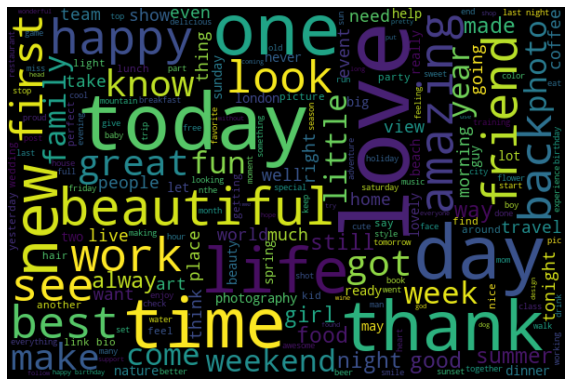

In [ ]:
all_words_lem = ' '.join([word for word in result['text_string_lem']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Visualize the top 10 frequent words:

In [ ]:
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

# Obtain top 10 words
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

### Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

result['polarity'] = result['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
result = pd.concat([result, result['polarity'].apply(pd.Series)], axis=1)
result['sentiment'] = result['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

The descriptions with the highest positive sentiment:

In [ ]:
result.loc[result['compound'].idxmax()].values

array(['thank you for calling ku’r salon & spa , how may i help you ? “can i please speak to the owner?” you are looking at her... going down memory lane with taline...this is what each of us had to say about her ...\\n“ very successful business woman. kind and caring boss!”\\n“ focused!”\\n“ hard working with a strong work ethic”\\n“ i have been honoured to be working with to taline  10 years and i feel so grateful to have her as a role model and mentor in my life. she has taught me so much and always inspires me”\\n“ smart business mind”\\n“people’s person and the most friendly boss”\\n“ strong loving personality”\\n“hard working, dedicated and a leader with heart. i feel that she truly cares for not only our clients, but for our staff, and make us feel like family. “\\n“ approachable and easy to work with”\\n“ she is straightforward so you always know where you stand with her”\\n“ sharper personality”\\n“ makes you work harder every day with her truly honest criticism”\\n“ very unde

The descriptions with the highest negative sentiment:

In [ ]:
result.loc[result['compound'].idxmin()].values

array(['we wear green to raise awareness for mental disorders or illnesses. our mind is a valuable asset in the human body. without a healthy mind we become lost in our own affairs. currently 450 million people in the world suffer from one or more mental disorders/illnesses. this is currently the fastest growing ill-health and disability issue in society today.mental disorders (or mental illnesses) are conditions that affect your thinking, feeling, mood, and behavior. they may be occasional or long-lasting (chronic). they can affect your ability to relate to others and function each day.there are many ,some of the mental illnesses include: depression, ptsd, bipolar affective disorder, schizophrenia and other psychoses, dementia, intellectual disabilities and developmental disorders including autism.if you think you or someone you love may be struggling with a mental health disorder, call one of these numbers to learn more about various mental health conditions and connect with valuable

Visualize the results:

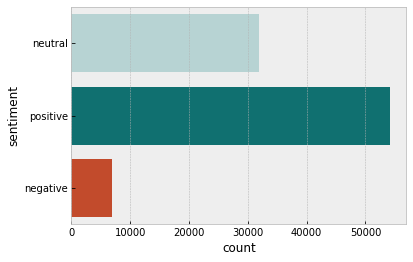

In [ ]:
sns.countplot(y='sentiment', 
             data=result, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

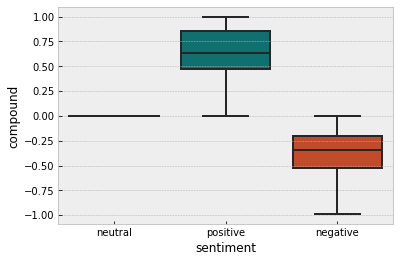

In [ ]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=result);

In [ ]:
# Clear Memory
del regexp, stopwords, all_words, tokenized_words, fdist, wordnet_lem, all_words_lem, words, fd, analyzer, result

# Command Line Question

Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)

Here is our script:

In [ ]:
sh = """
#!/bin/bash

echo "A script to find out the first 10 profiles who have published a post with a description longer than 100 characters"

echo "Downloading instagram_posts.zip";
wget https://adm2022.s3.amazonaws.com/instagram_posts.zip;
echo "Done";

echo "Unzipping instagram_posts.zip";
unzip instagram_posts.zip;
echo "Done";

echo "Creating a reduced version called reduced_posts.csv";
cut -f 3,4,8 instagram_posts.csv | tr '\t' ',' > reduced_posts.csv;
echo "Done";

echo "We take a look to the first 10 lines of reduced_posts.csv";
head -10 reduced_posts.csv;

echo "We perform the required task...";
awk -F',' -vOFS=',' '{if (length($3) > 100) print $1, $2, length($3)}' reduced_posts.csv | sort -t$',' -k3 -n | head -10 > results.csv;
echo "Done";
rm reduced_posts.csv

echo "Here are the results, the desired profiles are:";
awk -F',' -vOFS=',' '{if (length($2) == 0) print "User was not found!"; else print $2}' results.csv;
"""

with open('script.sh', 'w') as file:
  file.write(sh)

We set the `script.sh` file as executable:

In [ ]:
!chmod +x script.sh

We run it:

In [ ]:
!./script.sh

A script to find out the first 10 profiles who have published a post with a description longer than 100 characters
--2022-10-30 21:30:44--  https://adm2022.s3.amazonaws.com/instagram_posts.zip
Resolving adm2022.s3.amazonaws.com (adm2022.s3.amazonaws.com)... 52.217.142.185
Connecting to adm2022.s3.amazonaws.com (adm2022.s3.amazonaws.com)|52.217.142.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5133629852 (4.8G) [application/zip]
Saving to: ‘instagram_posts.zip.1’

instagram_posts.zip 100%[===================>]   4.78G  47.3MB/s    in 1m 44s  

2022-10-30 21:32:29 (47.1 MB/s) - ‘instagram_posts.zip.1’ saved [5133629852/5133629852]

Done
Unzipping instagram_posts.zip
Archive:  instagram_posts.zip
  inflating: instagram_posts.csv     
Done
Creating a reduced version called reduced_posts.csv
Done
We take a look to the first 10 lines of reduced_posts.csv
"post_id","profile_id","description"
"BXdjjUlgcgq",2237947779,"Wreckloose! Deevalley bike park laps on the 

# Algorithmic Question

## Part 1

### Python Implementation of the algorithm

In [ ]:
def f1(sequence: List[str],
       end: int) -> None:
  for i in range (0, end):
    print(sequence[i],'\n')

def f2(sequence: List[str],
       start: int,
       end: int) -> None:
  if start == end-1:
    f1(sequence, end)
    print('***')
  else:
    for i in range (start,end):
      temp = sequence[start] 
      sequence[start] = sequence[i]
      sequence[i] = temp
      f2(sequence, start+1, end) 
      temp = sequence[start] 
      sequence[start] = sequence[i]
      sequence[i] = temp
     
sequence = ['A','B','C'] 
n = len(sequence)
f2(sequence, 0, n)

A 

B 

C 

***
A 

C 

B 

***
B 

A 

C 

***
B 

C 

A 

***
C 

B 

A 

***
C 

A 

B 

***


The algorithm consists of two functions: 

- `f1()` a function called by the main function.
- `f2()` the main function of the algorithm.
    
Function `f1()` takes 2 arguments: an array `sequence` and an integer `end`.
The function spits out, on a different line, each element of the sequence up to the `end` element. 
(We assume that the user will input two integers such that `start` is less or at most equal to `end`, otherwise the algorithm will not work)

Function `f2()` takes 3 arguments: `sequence`, `end`, and `start`. This last argument is the element from which the user wants to activate `f2()`.

#### DIG INTO F2

The function promptly introduces an ‘if statement’ that checks if `start = end`. 
If it is so, the function returns `f1(sequence, end)` that simply outputs the elements of the sequence. 
If start ≠ end, the function loops over all the elements.
Within the loop, the element in the `start` position is swaped, using a temporary variable, with the element in the `i` position.
However, at the beginning, these operations are without effects.
Then, the function calls recursively itself and it is applied by taking as starting point the very next element of the sequence.
The above process reiterates until `start = end`.
It is then that the fuction returns as output the elements of the sequence. 
Notice that the sequence has not yet be changed by the opeartions occured so far.
After that, we assist at the first real change among the elements of the list.
In the last three rows of the first loop, the element in position `start`, which is refering to the last element of the sequence, is swaped with the element `i` which is the second-last one.
Then, the second iteration of the for-loop begins and the processes that follow falls under the same logic that we have seen above.

#### THE FINAL OUTPUT

All in all, the function returns the elements of the list in all the possible permutations, permuting the elements from `start` to `end`.
If `start` = 0, the function will return the permutations of all the elements.
If `start` = 3, the function will return the elements of the list but it will permute from the 3rd element.
Furthermore, looking more closely at this function, we have noticed an intersting property of this algorithm.
If the input sequence is ordered, the permutations are spit out in order. 
For instance, let's consider the sequence ['A','B','C'].
If we run `f2(sequence,start,end)` we will obtain:

1. A B C 
2. A C B
3. B A C
4. B C A
5. C A B
6. C B A

(with each element on a separate line).



### Running Time

Big-O complexity means finding the asymptotical complexity of the algorithm.

This means that we are interested in the worst case scenario.
The worst running time is achieved when 'start' refers to the first element of the sequence.

Having said that, we analyse the `f2()` fuction and we find a for-loop that iterates along the length of the sequence.
So, we annotate $n * \dots$, where $n$ is length of the sequence.
Then, what it is relevant is the recursion. So we write $n * T(n-1)$.

So, until now, we have:

$$
T(n) = n * T(n-1)\\
T(n-1) = (n-1) * T(n-2)\\
\dots
$$
                        
We infer that $T(n) = n*(n-1)*...(1) * T(0) = n!*T(0)$

Moreover, we know that if start = end -> the algorithm uses the `f1()` function to prints the n elements of the sequence (by means of a for loop).
Therefore, $T(0) = n$.

We conclude that $O(n*n!)$.

### A Better Algorithm

We didn't find a better algorithm for this task.

## Part 2

### 1. Recursive Algorithm

Our stategy consists of maximizing the product by making cuts at different positions and comparing the values obtained after each cut.

We can recursively call the `cut1()` function for the remaining length of the ribbon after a cut of length $i$.

In [ ]:
def cut1(n: int) -> int:
    # Simple cases: n=0 or n=1
    #In this case, we cannot satisfy rule 1 and rule 2.
    # So, return 0.
    if n == 0 or n == 1:
        return 0
    
    # Standard case: n!=0 and n!=1
    max_val = 0 # initialize 'max_val' variable that will be progressively updated
    for i in range(1,n): 
        # make a cut of length i, and compare...
        # 1. the max_val,
        # 2. the product of the cut of length i and the remaining piece
        # 3. the product of the cut of length i and the value that comes out from cut1(n-i), which, on its turn, replicates the above process
        max_val = max(max_val, i*(n-i), cut1(n-i)*i)
 
    #Return the maximum of all values
    return max_val

### 2. Show that the Algorithm has Expèonential Running Time

```python

def code(n):
  if n == 0 or n == 1:
    return 0
  max_val = 0 
  for i in range(1,n): 
    max_val = max(max_val, i*(n-i), cut(n-i)*i); 
  return max_val

```

We are interested in finding the complexity of the algorithm.
In line 4, we run into a for loop.

So we can annotate:
$$
(n-1)*\dots
$$

Then, we recall recursevely the `cut1()` function.

Therefore:
$$
(n-1)*T(n-1)
$$

So:
$$
T(n) = (n-1)*T(n-1)\\
T(n-1) = (n-2)*T(n-2)
$$

We also know that $T(2) = 1$.

So: 

$$
T(n) = (n-1)*(n-2)*(n-3)*....1*T(2)
$$

In the end we have that:
$$
O(n^n)
$$

### 3. Dynamic Programming Algorithm (TOP-DOWN)

We have thought of a dynamic way to store the results of each cut so that all the sub-problems that we meet are only solved once.

In order to hit our target, we will serve of an array that will store all the intermediate results we come accross.

In [ ]:
def cut2(n: int) -> int:
    values= [0 for i in range(n+1)]  # initialize our array that will store the intermediate values

    for i in range(1,n+1):
        max_val = 0;
        for j in range(1,i):
            # store the max value among:
            # 1. max_val;
            # 2. the product of two sub-cuts made on a cut of length i;
            # 3. the product of the intermediiate max_val (stored in the array at position i-j) and a cut of length j.
            max_val = max(max_val, (i-j)*j, j*values[i-j])
        values[i] = max_val #the ith elemnt of the array is updated with the new max_val
    return values[n]

### 4. Evaluate the Running Time

We write a function that takes as argument a function and the lenght of the ribbon:

In [ ]:
def time_cut(f, n: int):

    st = time.time() # we use the module time to compute the exact time the function takes to be executed.
    f(n)
    et = time.time()

    return (et-st)

In two arrays, we store the time tha two function `cut1()` and `cut2()` take to be executed `for n in range(2, 25)`:


In [ ]:
time_cut1 = [time_cut(cut1, i) for i in range(2,25+1)] 

In [ ]:
time_cut2 = [time_cut(cut2, i) for i in range(2,25+1)]

Lastly, we plot the results:

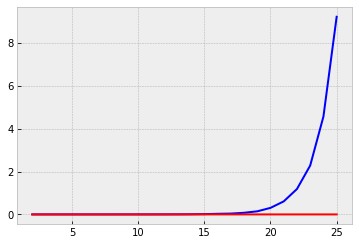

In [ ]:
x = np.arange(2,26)
plt.plot(x,time_cut1,color='blue')
plt.plot(x,time_cut2,color='red')

### 5. Optimization

We have found a tricky way of solving the problem. 

After seeing some examples, it can be observed that the maximum product can be obtained by repeatedly cutting parts of size 3 (while size is greater than 4) keeping the last part of size 2 or 3 or 4. 

In [ ]:
def cut3(n: int) -> int:
     
    # n equals to 2 or 3 must are our base
    if (n == 2 or n == 3):
        return (n - 1)

    # if n is greater than 4...
    # ...Keep removing parts of size 3

    prod = 1 # initialize the carrying product
    while (n > 4):
        n -= 3
          
        # Keep multiplying 3 (which is the cut of length 3) to prod
        prod *= 3
     
    # Return the product n*remain 
    # where n is the last part remaining
    # remain is the product of the previous parts
    return (n * prod)

We optimized the algorithm finding a way to solve the problem with a complexity of $O(n)$ (because there is only a while loop).